<H1><b><span style="color: blue;">
Bike Sharing Assignment   
</span></b></H1>
<H2><b><span style="color: blue;">
Problem Statement:
</span></b></H2>
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    * Which variables are significant in predicting the demand for shared bikes.
    * How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factor
<H2><b><span style="color: blue;">
Business Goal:
</span></b></H2>

It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 


<a href="#1.-Reading-and-Understanding-the-dataFrame">Reading and Understanding the dataFrame</a>  
<a href="#2.-Find-missing-value-Threshold">Find missing value Threshold</a>  
<a href="#3.-Removing-redundant-and-unwanted-columns">Removing redundant and unwanted columns</a>  
<a href="#4.-Visualisation-of-dataset">Visualisation of dataset</a>  
<a href="#5.-Data-preparation-for-Linear-Regression">Data preparation for Linear Regression</a>  
<a href="#6.-Build-a-linear-model">Build a linear model</a>  
<a href="#7.-Calculate-VIF">Calculate VIF</a>  
<a href="#8.-Residual-Analysis">Residual Analysis</a>  
<a href="#9.-Homoscedasticity-Of-Model">Homoscedasticity-Of-Model</a>  
<a href="#10.-Multicolinearity-Of-Model">Multicolinearity Of Model</a>   
<a href="#11.-Linearity-Of-Model">Linearity Of Model</a>   
<a href="#12.-Final-Prediction-on-test-data-set">Final Prediction on test data set</a>   
<a href="#13.-Model-Evaluation">Model Evaluation</a>   



<H3><b><span style="color: blue;">
Importing requried modules
</span></b></H3>

In [216]:

# requried imports
import calendar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('ggplot')

warnings.filterwarnings("ignore")

<H3><b><span style="color: blue;">
Importing dataFrames
</span></b></H3>

In [120]:
bike_share_data_set = pd.read_csv("day.csv")



## 1. Reading and Understanding the dataFrame


In [121]:
#check shape of dataFrame 
print(bike_share_data_set.shape) 

# head to check few data from bike share dataFrame
bike_share_data_set.head() # shows number of row and columns

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [122]:
# check each data type and null values for bike share dataFrame
bike_share_data_set.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [123]:
# Describe dataFrame
# bike_share_data_set.describe()
bike_share_data_set.describe().apply(lambda col: col.apply('{0:.4f}'.format))

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9959,0.6904,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0003,0.4626,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


## 2. Find missing value Threshold

In [124]:
pd.set_option('display.max_rows', None)

# Missing values percentages in bike share dataframe
app_row, col = bike_share_data_set.shape
null_count = bike_share_data_set.isnull().sum()
null_percentage = round((bike_share_data_set.isnull().sum()/app_row)*100,2)
null_display = pd.DataFrame({"Null percentage": null_percentage, "Null count": null_count})
print(null_display.shape)
null_display.sort_values(by = "Null percentage", ascending=False)

(16, 2)


,Null percentage,Null count
instant,0.0,0
dteday,0.0,0
season,0.0,0
yr,0.0,0
mnth,0.0,0
holiday,0.0,0
weekday,0.0,0
workingday,0.0,0
weathersit,0.0,0
temp,0.0,0


<H3><b><span style="color: blue;">
Inferences:    
</span></b></H3>

   * No missing and null values in bike sharing dataset 
   * Mean median is same so no outliers in datasets

## 3. Removing redundant and unwanted columns

<H3><b><span style="color: blue;">
Inferences: 
</span></b></H3>

   * Based on understanding of dataset and each columns following columns can be removed   
       * instant: It is just repeated row index value
       * dteday: We have seprate columns for 'year' & 'month'
       * Casual: 'Casual' and 'registered' data already combined to 'cnt' column data
       * registered: 'Casual' and 'registered' data already combined to 'cnt' column data

In [125]:
#Before dropping dteday, create days_old column which gives how old is the business
bike_share_data_set['days_old'] = (
    pd.to_datetime(bike_share_data_set['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')
).dt.days

columns_to_remove = ["instant", "dteday", "registered", "casual"]
bike_share_data_set.drop(columns_to_remove, axis=1, inplace=True)
bike_share_data_set.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

## 4. Visualisation of dataset

<H3><b><span style="color: blue;">
 Visualising Categorical Variables
</span></b></H3>

In [126]:
# finidng no of unique in each col
unique_count = bike_share_data_set.nunique()
print(unique_count)
# consider all columns as catogorical if num unique <=12 
categorical_variables = unique_count[unique_count<=12].index.tolist()
print("categorical columns:", categorical_variables)
columns_to_plot = []
columns_to_plot.extend(categorical_variables)
columns_to_plot.append("cnt")


season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64
categorical columns: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [127]:
# replacing row values to actual values for better reading 
bike_share_data = bike_share_data_set
bike_share_data["season"].replace(1, "spring", inplace=True)
bike_share_data["season"].replace(2, "summer", inplace=True)
bike_share_data["season"].replace(3, "fall", inplace=True)
bike_share_data["season"].replace(4, "winter", inplace=True)


In [128]:
# replace month no to month name
bike_share_data["mnth"] = bike_share_data["mnth"].apply(lambda x: calendar.month_abbr[x])

In [129]:
# # replace year to 2018 and 2019
bike_share_data["yr"].value_counts()
bike_share_data["yr"] = bike_share_data["yr"].map({0:'2018', 1:'2019'})

In [130]:
#weekday mapping to weekday name
bike_share_data["weekday"] = bike_share_data["weekday"].map(
    {
        0:"Sunday", 1:"Monday", 2:"Tuesday",
        3:"Wednesday", 4:"Thrusday", 5:"Friday",
        6:"Saturday"
    }
)

In [131]:
#mapping wethersit
bike_share_data["weathersit"] = bike_share_data["weathersit"].map(
    {
        1:"Clear",
        2:"Mist_Cloudy",
        3:"LightSnow_LightRain",
        4:"Heavy_Rain_Snow_Fog"
    }
)


Plot for all catogorical columns, Total col:8


<Figure size 1440x720 with 0 Axes>

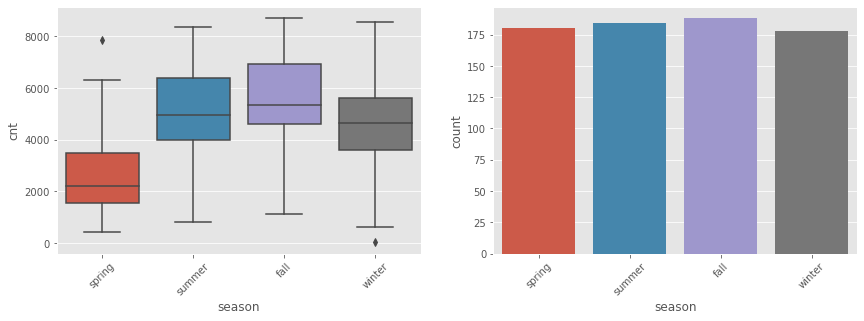

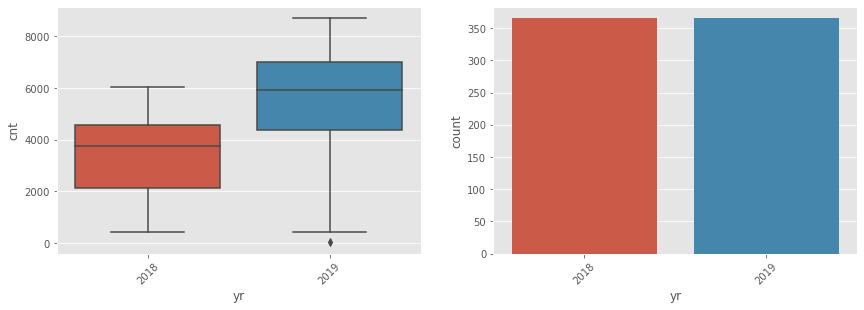

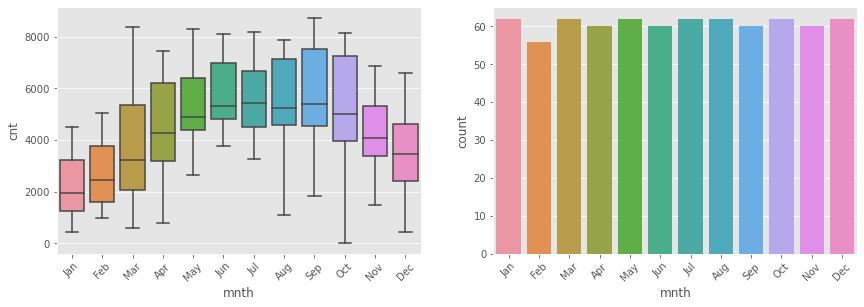

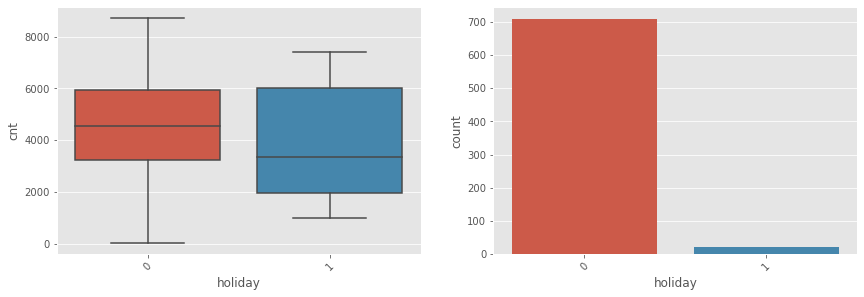

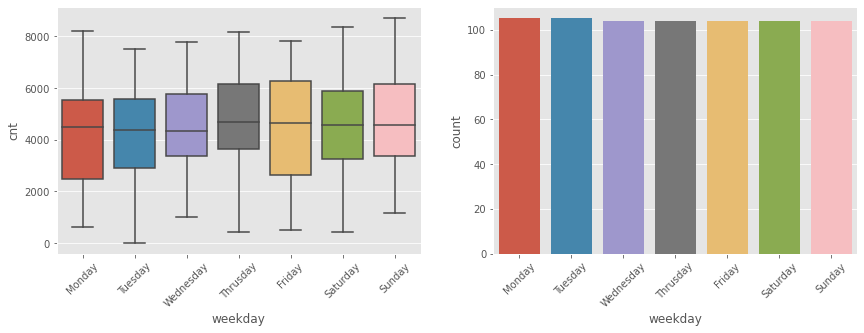

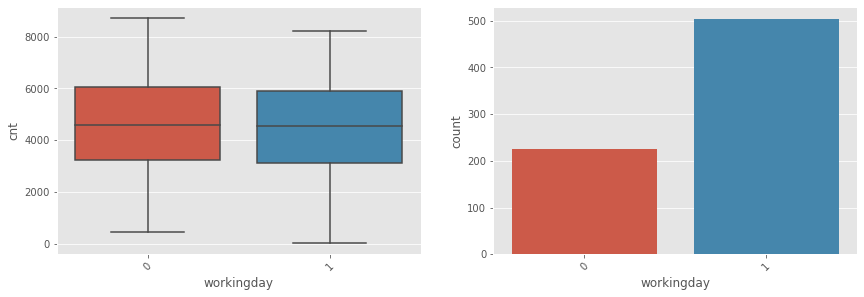

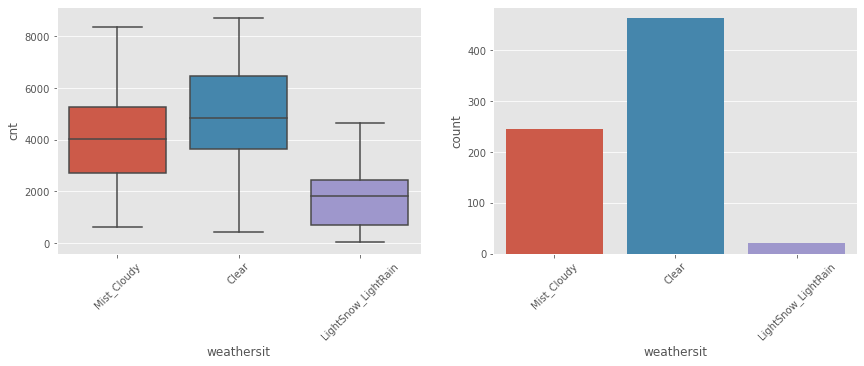

In [132]:
all_categorical_col_df = bike_share_data[columns_to_plot]

plt.figure(figsize = (20, 10))
# count plot
print("Plot for all catogorical columns, Total col:{}".format(len(all_categorical_col_df.columns)))
for each in categorical_variables:
    plt.figure(figsize = (30, 10))

    plt.subplot(2,4,1)
    sns.boxplot(x = each, y = 'cnt', data = all_categorical_col_df)
    plt.xticks(rotation=45)

    plt.subplot(2,4,2)
    sns.countplot(all_categorical_col_df[each])
    plt.xticks(rotation=45)

    plt.show()


<H3><b><span style="color: blue;">
Inference on categorical columns: 
</span></b></H3>

   * Based on box plot and count plot following observation can be drawn
       * Fall has highest demand for rental bikes
       * Demand has grown for 2019 yr than 2018 yr
       * Demand is growing from jan to jun. Sep has highest demand. During winter ie from oct to Dec it started to decreased. 
       * Holidays time demand was too low.
       * Weekday vaiable not giving clear picture about demand.since median is same for all days.
       * Working day has high demand    
       * Clear weather has high demand

<H3><b><span style="color: blue;">
 Visualising continuous Variables
</span></b></H3>

In [133]:
# consider all columns as numerical if num unique >12 
numerical_columns = unique_count[unique_count>12].index.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']


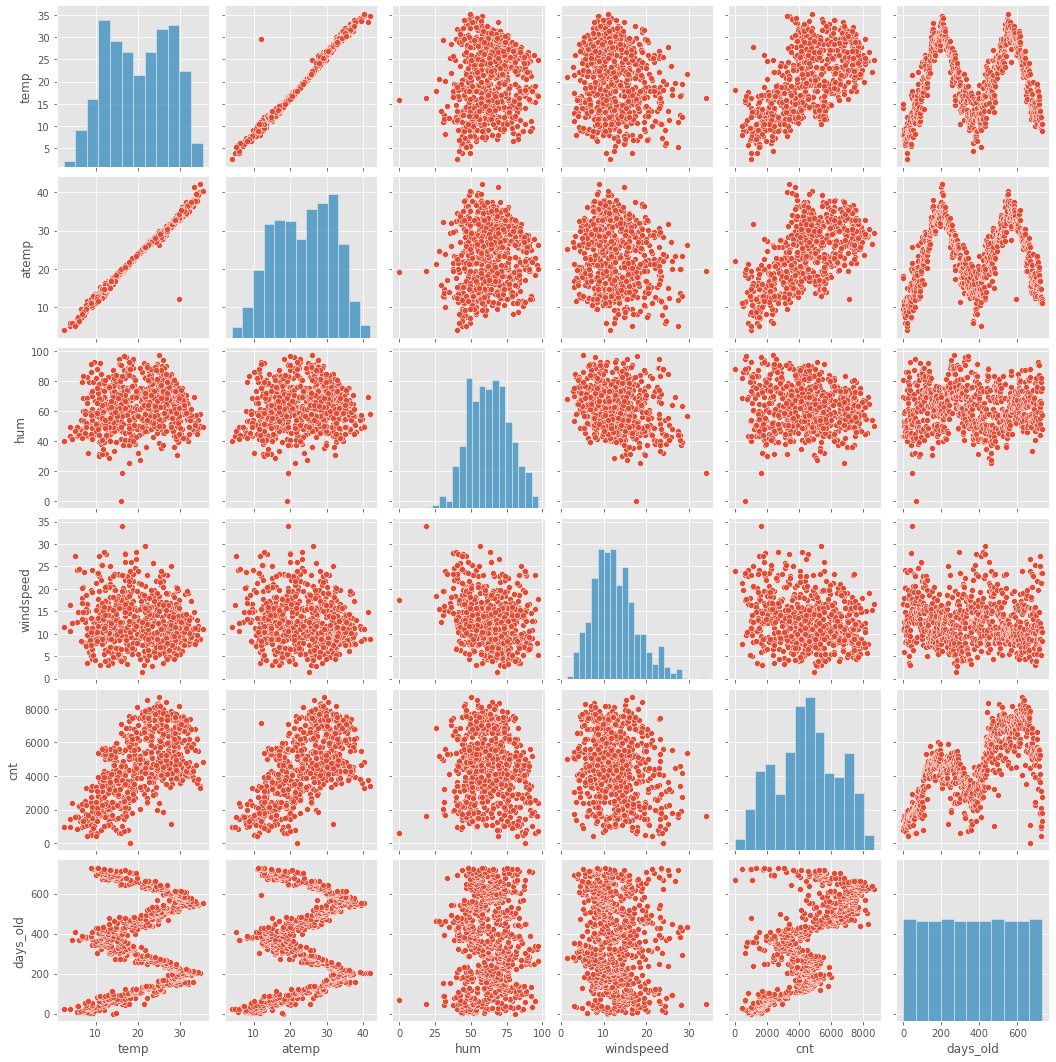

In [134]:
#Pairplots for continuous numeric variables
sns.pairplot(data=bike_share_data, vars=numerical_columns)
plt.show()

<H3><b><span style="color: blue;">
Inference on continuous columns: 
</span></b></H3>

   * Based on scatter plot for continuous numerical columns following observation can be drawn
       * `atemp` and `temp` has the highest corelation with the `cnt` variable
       * `atemp` and `temp` highly correalated with each other


<AxesSubplot:>

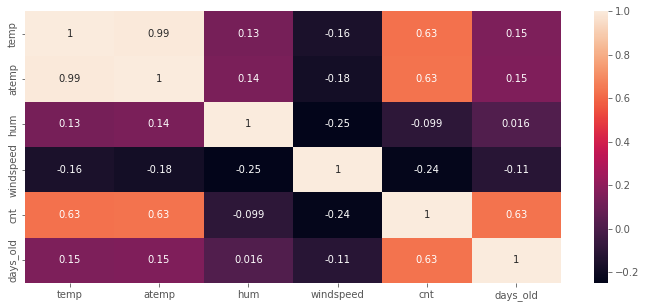

In [135]:
# checking continuous variables relationship with each other
plt.figure(figsize=(12, 5))

sns.heatmap(bike_share_data[numerical_columns].corr(), annot=True)

<H3><b><span style="color: blue;">
Inference using heatmap: 
</span></b></H3>

   * Based on heatmap following observation can be drawn
       * `atemp` and `temp` has correlation more than 0.99 ie almost 1 
       * `atemp` and `temp` highly correalated with each other
       * Looks like `atemp` derived from `temp` so we can dropped `atemp`

<AxesSubplot:>

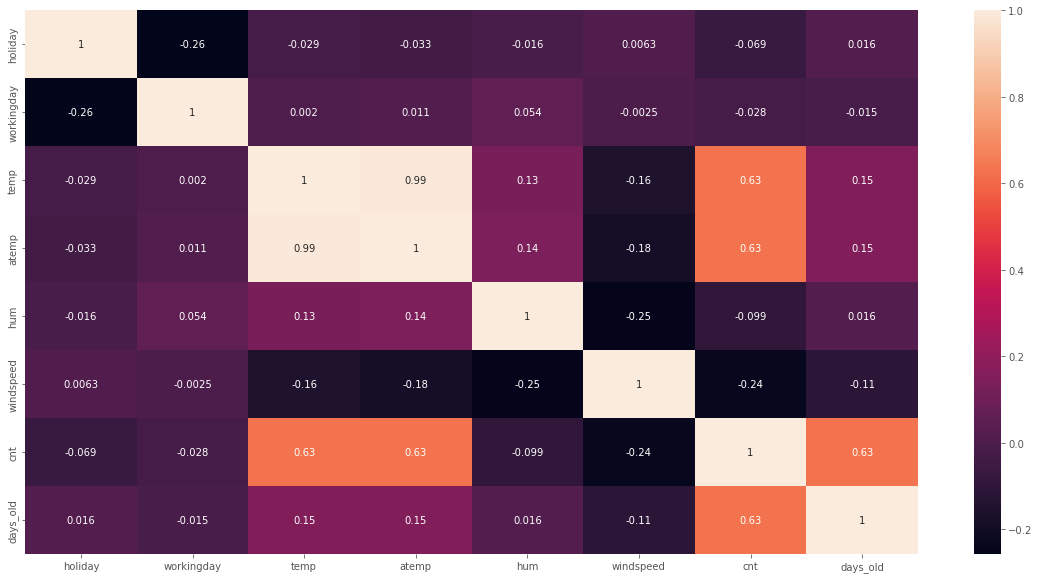

In [136]:
plt.figure(figsize=(20, 10))
corr = bike_share_data.corr()
sns.heatmap(corr, annot=True)

<H3><b><span style="color: blue;">
Inference using heatmap correlation: 
</span></b></H3>

   * Based on heatmap correaltion map following observation can be drawn
       * `atemp`  `temp` and `days_old` highly correalted 
       * Can be eliminate during model builidng depend on the inflation

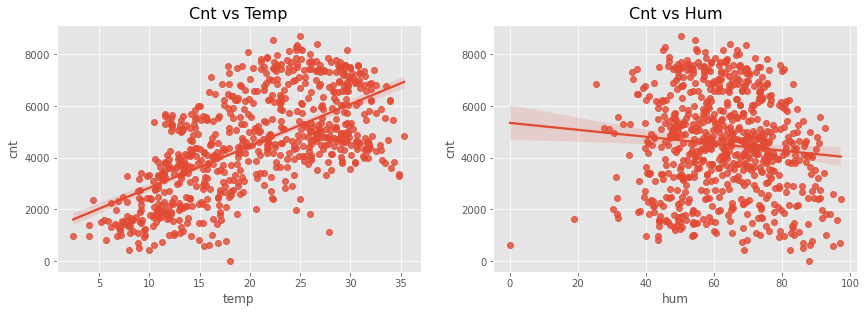

In [137]:
#regression plot
plt.style.use('ggplot')
# sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# plt.style.use('ggplot')
plt.figure(figsize = (30, 10))
plt.subplot(2,4,1)
plt.title("Cnt vs Temp", fontsize=16)
sns.regplot(data=bike_share_data, y="cnt", x="temp")
plt.subplot(2,4,2)
plt.title("Cnt vs Hum", fontsize=16)
sns.regplot(data=bike_share_data, y="cnt", x="hum")
# plt.subplot(2,4,3)
# plt.title("Cnt vs Windspeed", fontsize=16)
# sns.regplot(data=bike_share_data, y="cnt", x="windspeed")
# plt.subplot(2,4,4)
# plt.title("Cnt vs Weathersit", fontsize=16)
# sns.regplot(data=bike_share_data, y="cnt", x="weathersit")
plt.show()




<H3><b><span style="color: blue;">
 Inference using regression plot:
</span></b></H3>

   * Based on regression plot following observation can be drawn
       * Demand is linearly increasing with `temp`
       * `hum` is more scattered around
       * Demand decreasing with increasing `hum`
       * Demand is low in 3 & 4 weathersit ie 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
           4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



## 5. Data preparation for Linear Regression

In [138]:
bike_share_data_set.info()
bike_share_data_set.head()
# bike_share_data_set.drop("atemp", axis=1, inplace=True) # dropping becuase atemp and temp is similar 
bike_share_data_set.drop("days_old", axis=1, inplace=True) # just created for visualisation 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


In [139]:
bike_share_data_set.dtypes

season         object
yr             object
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [63]:
# bike_share_data_set = pd.get_dummies(data=bike_share_data_set, columns=["weathersit"]) # not dropping first column because to preserve the each column description  
# bike_share_data_set.head()
# bike_share_data_set["yr"] = bike_share_data_set["yr"].map({"2018":0, "2019":1})

In [140]:
#convert category to data type
bike_share_data_set['season'] = bike_share_data_set['season'].astype('category')
bike_share_data_set['weathersit'] = bike_share_data_set['weathersit'].astype('category')
bike_share_data_set['mnth'] = bike_share_data_set['mnth'].astype('category')
bike_share_data_set['weekday'] = bike_share_data_set['weekday'].astype('category')

In [141]:
#bike_share_data_set = pd.get_dummies(data=bike_share_data_set, columns=["season", "mnth", "weekday", "yr"], drop_first=True)
bike_share_data_set = pd.get_dummies(data=bike_share_data_set, drop_first=True)
bike_share_data_set.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# split data into training and test
print(bike_share_data_set.shape)
bike_share_data_set.info()

(730, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   holiday                         730 non-null    int64  
 1   workingday                      730 non-null    int64  
 2   temp                            730 non-null    float64
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_spring                   730 non-null    uint8  
 8   season_summer                   730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  yr_2019                         730 non-null    uint8  
 11  mnth_Aug                        730 non-null    uint8  
 12  mnth_Dec                  

## 6. Build a linear model

In [143]:
#spliting data into test and train
x_train, x_test = train_test_split(bike_share_data_set, train_size=0.7, test_size=0.3, random_state=100)

x_train.describe()
x_train.head()

print(x_train.shape)
print(x_test.shape)
x_test.head()

(510, 30)
(219, 30)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [144]:
x_train.dtypes

holiday                             int64
workingday                          int64
temp                              float64
atemp                             float64
hum                               float64
windspeed                         float64
cnt                                 int64
season_spring                       uint8
season_summer                       uint8
season_winter                       uint8
yr_2019                             uint8
mnth_Aug                            uint8
mnth_Dec                            uint8
mnth_Feb                            uint8
mnth_Jan                            uint8
mnth_Jul                            uint8
mnth_Jun                            uint8
mnth_Mar                            uint8
mnth_May                            uint8
mnth_Nov                            uint8
mnth_Oct                            uint8
mnth_Sep                            uint8
weekday_Monday                      uint8
weekday_Saturday                  

In [145]:
#normalized scaler to scale
scaler = MinMaxScaler() 

numerical_columns = ["temp",  "hum", "windspeed", "cnt", "atemp"]
print(numerical_columns)

# fit and transform training set
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
y_train = x_train.pop("cnt")
x_train.info()

['temp', 'hum', 'windspeed', 'cnt', 'atemp']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   holiday                         510 non-null    int64  
 1   workingday                      510 non-null    int64  
 2   temp                            510 non-null    float64
 3   atemp                           510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   season_spring                   510 non-null    uint8  
 7   season_summer                   510 non-null    uint8  
 8   season_winter                   510 non-null    uint8  
 9   yr_2019                         510 non-null    uint8  
 10  mnth_Aug                        510 non-null    uint8  
 11  mnth_Dec                        510 non-null    uin

In [146]:
#  Running RFE(Recursive feature elimination ) We will be using the LinearRegression function from SciKit
lm = LinearRegression()
lm.fit(x_train, y_train)

#cut down no of variables to 15 using auomated approach 
rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

print(x_train.columns[rfe.support_])
list(zip(x_train.columns, rfe.support_, rfe.ranking_))


Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')


[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [147]:
# print columns selected by RFE.

col_selected_by_rfe = x_train.columns[rfe.support_]
print("Following columns selected by RFE \n\n", col_selected_by_rfe)

# print columns not selected by RFE
col_deselect_by_rfe = x_train.columns[~rfe.support_]
print("\n\nFollowing columns deselected by RFE \n\n", col_deselect_by_rfe)
# dataset with columns selected by RFE
x_train_rfe = x_train[col_selected_by_rfe]
x_train_rfe.head()

Following columns selected by RFE 

 Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')


Following columns deselected by RFE 

 Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')


,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0
576,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,0
426,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1
728,0,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,1


<H3><b><span style="color: blue;">
 Function to build model:
</span></b></H3>

In [148]:
def build_statsmodel(train_data_x, train_data_y, cols):
    print("Regression Result:")
    x_train_sm = sm.add_constant(train_data_x[cols])
    # Fit the resgression line using 'OLS'
    lr = sm.OLS(train_data_y, x_train_sm).fit()
    print(lr.summary())
    print(lr.params)
    return lr

## 7. Calculate VIF

In [173]:
def find_vif(x_train_rfe, cols):
    print("Feature VIF \n\n")
    dataframe = x_train_rfe[cols]
    vif = pd.DataFrame()
    vif["Features"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, each) for each in range(dataframe.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print(vif)

<H3><b><span style="color: blue;">
 Model 1
</span></b></H3>

In [183]:
# all variable selected by rfe
x_train = x_train[list(col_selected_by_rfe)]
build_statsmodel(x_train, y_train, list(x_train.columns))
find_vif(x_train, list(col_selected_by_rfe))

Regression Result:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          3.34e-189
Time:                        21:33:11   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on regression model following observation can be drawn
       * `hum` VIF is very high 30.94

In [184]:
len(x_train.columns)

15

<H3><b><span style="color: blue;">
 Model 2
</span></b></H3>

<H3><b><span style="color: blue;">
    Removing variable hum since high VIF for hum = 30
</span></b></H3>

In [185]:
#Removing variable hum since high VIF for hum = 30
x_train_new = x_train.drop(["hum"], axis=1)
len(x_train_new.columns)

14

In [186]:
build_statsmodel(x_train_new, y_train, list(x_train_new.columns))
find_vif(x_train_new, list(x_train_new.columns))

Regression Result:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          1.57e-186
Time:                        21:33:29   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on 2nd regression model following observation can be drawn
       * `summer` has high p value 0.032

<H3><b><span style="color: blue;">
 Model 3
</span></b></H3>

<H3><b><span style="color: blue;">
    Removing variable `summer` since high p value
</span></b></H3>

In [187]:
#Removing variable summer since high p value season_summer
x_train_new = x_train_new.drop(["season_summer"], axis=1)
len(x_train_new.columns)

13

In [188]:
build_statsmodel(x_train_new, y_train, list(x_train_new.columns))
find_vif(x_train_new, list(x_train_new.columns))


Regression Result:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          1.08e-186
Time:                        21:33:56   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on 3nd regression model following observation can be drawn
       * `mnth_Nov` has high p value 0.010

<H3><b><span style="color: blue;">
 Model 4
</span></b></H3>

<H3><b><span style="color: blue;">
    Removing variable `mnth_Nov` since high p value
</span></b></H3>

In [189]:
#Removing variable mnth_Dec since p value 0.010
x_train_new = x_train_new.drop(["mnth_Nov"], axis=1)
len(x_train_new.columns)

In [191]:
build_statsmodel(x_train_new, y_train, list(x_train_new.columns))
find_vif(x_train_new, list(x_train_new.columns))


Regression Result:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          2.02e-186
Time:                        21:35:54   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

12

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on 4th regression model following observation can be drawn
       * `mnth_Dec` has high p value 0.037

<H3><b><span style="color: blue;">
 Model 5
</span></b></H3>

<H3><b><span style="color: blue;">
    Removing variable `mnth_Dec` since high p value
</span></b></H3>

In [192]:
#Removing variable month_dec p value 0.037
x_train_new = x_train_new.drop(["mnth_Dec"], axis=1)
len(x_train_new.columns)

In [193]:
build_statsmodel(x_train_new, y_train, list(x_train_new.columns))
find_vif(x_train_new, list(x_train_new.columns))
len(x_train_new.columns)

Regression Result:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          1.13e-186
Time:                        21:37:03   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

11

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on 5th regression model following observation can be drawn
       * `mnth_Jan` has high p value 0.018

<H3><b><span style="color: blue;">
 Model 6
</span></b></H3>

<H3><b><span style="color: blue;">
    Removing variable `mnth_Jan` since high p value
</span></b></H3>

In [194]:
#Removing variable hum since high VIF for hum = 30
x_train_new = x_train_new.drop(["mnth_Jan"], axis=1)
len(x_train_new.columns)

10

In [195]:
module_6_lr = build_statsmodel(x_train_new, y_train, list(x_train_new.columns))
find_vif(x_train_new, list(x_train_new.columns))


Regression Result:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          1.16e-186
Time:                        21:38:38   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on 6th regression model following observation can be drawn

       * We can consider above model is seems to be significant since very low p value and very low multicolinearity.
       * F-Statistics value of `248.7` and the Prob (F-Statistics) value of `1.16e-186` ie almost equal to zero 
       * State that overall  model is significant 

## 8. Residual Analysis

In [196]:
x_train_new.head()

,holiday,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
653,0,0.509887,0.300794,0,1,1,0,0,0,0
576,0,0.815169,0.264686,0,0,1,1,0,0,0
426,0,0.442393,0.255342,1,0,1,0,0,0,1
728,0,0.245101,0.663106,1,0,1,0,0,0,0
482,0,0.395666,0.188475,0,0,1,0,0,0,1


In [200]:
# calcualte the prediction of y for the model 6
X_train_lm_6 = sm.add_constant(x_train_new)

y_train_pred_data = module_6_lr.predict(X_train_lm_6)


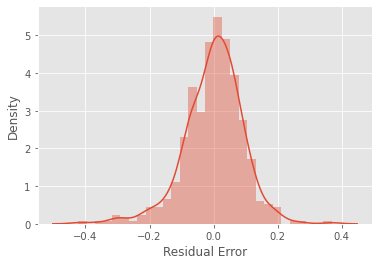

In [203]:
# Distribution Of Error Terms
sns.distplot(y_train - y_train_pred_data, bins=30)
plt.xlabel("Residual Error")
plt.show()

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on Residual Analysis following observation can be drawn

       * As per the above graph, errors are normally distributed


## 9. Homoscedasticity Of Model

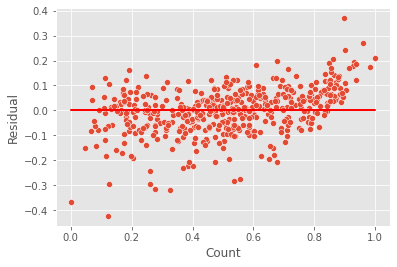

In [206]:
residual = y_train - y_train_pred_data
sns.scatterplot(y_train, residual)
plt.plot(y_train, (y_train-y_train), "-r")
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on Homoscedasticity model following observation can be drawn

       * Model is distributed over the line

## 10. Multicolinearity Of Model

In [209]:
find_vif(x_train_new, list(x_train_new.columns))


Feature VIF 


                         Features   VIF
1                            temp  4.60
2                       windspeed  4.00
5                         yr_2019  2.06
3                   season_spring  1.65
9          weathersit_Mist_Cloudy  1.51
4                   season_winter  1.40
6                        mnth_Jul  1.35
7                        mnth_Sep  1.20
8  weathersit_LightSnow_LightRain  1.08
0                         holiday  1.04


<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on Multicolinearity model following observation can be drawn

       * All the value less than 5. So the model is having no multicolinearity

## 11. Linearity Of Model

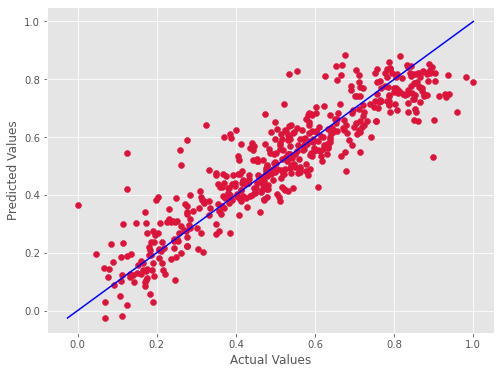

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_data, c="crimson")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_train_pred_data), max(y_train))
p2 = min(min(y_train_pred_data), min(y_train))
plt.plot([p1, p2], [p1, p2], "-b")

<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on Linearity Of Mode following observation can be drawn

       * The actual value and predicted value are showing linearly corelation

## 12. Final Prediction on test data set

In [212]:
#normalized scaler to scale
scaler = MinMaxScaler() 

numerical_columns = ["temp",  "hum", "windspeed", "cnt", "atemp"]

# fit and transform training set
x_test[numerical_columns] = scaler.fit_transform(x_test[numerical_columns])
x_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [213]:
y_test = x_test.pop("cnt")
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [215]:
column_test = x_train_new.columns
x_test = x_test[column_test]
x_test.head()

,holiday,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,1,0.837241,0.149393,0,0,0,1,0,0,1
535,0,0.911423,0.231142,0,0,1,0,0,0,0
299,0,0.496221,0.443398,0,1,0,0,0,0,1
221,0,0.890387,0.449707,0,0,0,0,0,0,0
152,0,0.821739,0.682387,0,0,0,0,0,0,0


In [220]:
x_test_lm_final = sm.add_constant(x_test)
y_test_pred = module_6_lr.predict(x_test_lm_final)

# checking r2
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.7953777856921883


## 13. Model Evaluation

Text(0, 0.5, 'y pred')

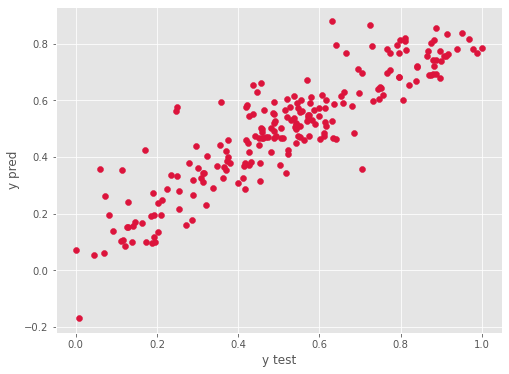

In [222]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, c="crimson")
plt.xlabel("y test")
plt.ylabel("y pred")


In [224]:
module_6_lr.params

const                             0.251899
holiday                          -0.098556
temp                              0.451455
windspeed                        -0.139817
season_spring                    -0.110795
season_winter                     0.047278
yr_2019                           0.234092
mnth_Jul                         -0.072719
mnth_Sep                          0.057705
weathersit_LightSnow_LightRain   -0.286408
weathersit_Mist_Cloudy           -0.081133
dtype: float64

<H3><b><span style="color: blue;">
 Equation:
</span></b></H3>

   * cnt = 0.251899 + (-0.098556 * holiday) + (0.451455 * temp) + (-0.139817 * windspeed) + (0.110795 * season_spring) + \
    (0.047278 * season_winter) + (0.234092 * yr_2019) + (-0.072719 * mnth_Jul) + (0.057705 * mnth_Sep) + \
    (-0.286408 * weathersit_LightSnow_LightRain) + (-0.081133 * weathersit_Mist_Cloudy)

In [225]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)


0.7855


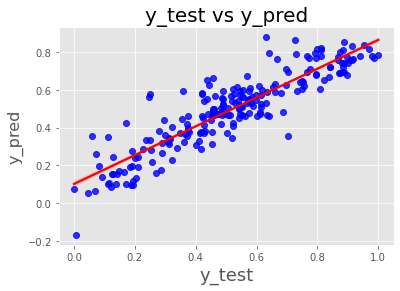

In [226]:

# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


<H3><b><span style="color: blue;">
 Inference:
</span></b></H3>

   * Based on y_test vs y_pred graph, observation can be drawn

       * The model is giving accurate prediction as the graph between test and predicted data is linear

<H3><b><span style="color: blue;">
 Final Summary:
</span></b></H3>

   * Train dataset R^2: 0.833
   
   * Train dataset Adjusted R^2: 0.830
   
   * Test dataset R^2:0.795
   
   * Test dataset Adjusted R^2:0.7855
   

<H3><b><span style="color: blue;">
 Demand of Bike Depends on the below factor:
</span></b></H3>

In [228]:
module_6_lr.params

const                             0.251899
holiday                          -0.098556
temp                              0.451455
windspeed                        -0.139817
season_spring                    -0.110795
season_winter                     0.047278
yr_2019                           0.234092
mnth_Jul                         -0.072719
mnth_Sep                          0.057705
weathersit_LightSnow_LightRain   -0.286408
weathersit_Mist_Cloudy           -0.081133
dtype: float64